This code produces map plots of mean precipitation for each ITCZ state for all observations (IMERG (MW+IR), IMERG (MW), GPCP) and all reanalyses (ERA5, MERRA-2, CFSR, and JRA-3Q) for January through May, 1998-2024. The percent contribution of each ITCZ state's rainfall to mean rainfall is also computed.

In [2]:
#Author: Alex Gonzalez
#Date: November 2025
#Paper: JGR-Atmospheres

Figure 5. January through May daily mean precipitation rate (mm day−1) for each ITCZ state
and in seven different data sets (from top to bottom row): IMERG (MW+IR), IMERG (MW), and
GPCP observations, ERA5, MERRA-2, JRA-3Q, and CFSR reanalyses during 1998–2024. Each
panel shows the percent occurrence of each ITCZ state in the top left and the black rectangles
represent the East Pacific domain.

Table 2. Percent contribution (%) of each ITCZ state to the total precipitation over the eastPacific Ocean (90◦W–135◦W, 20◦S–20◦N) in observations (IMERG (MW+IR), IMERG (MW), andGPCP), reanalyses (ERA5, MERRA-2, CFSR, and JRA-3Q), and CMIP6 models (top, intermediate,and bottom model groups) for January through May. Note that “All ITCZ” refers to all ITCZstates except aITCZ.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import ImageGrid

In [7]:
# months of interest
mn0 = 1
mnf = 5
mn_str = 'Jan-May'#Feb-Apr'

# wide latitudes
lat0 = -20.
lat1 = 20.

# longitudes – East Pac
lon0 = -170
lon1 = -70
#lon0 = -135
#lon1 = -90

# East Pacific box
lon0_box = -135
lon1_box = -90

# longitudes – Atlantic
#lonw = -40
#lone = 5

region_fn = 'EastPac'
#region_fn = 'Atlantic'

region_ti = 'East Pacific'
#region_ti = 'Atlantic'

# year(s) of interest
yr0 = 1998
yrf = 2024
yr_str = str(yr0)+'-'+str(yrf)

# rain thresh
rain_thresh_str = '5.0mm'

figfolder = '/home/alex.gonzalez/CMIP6_ITCZ_state_project/figures/methods_paper/revision/'
figname = 'Obs_reana_pr_maps_'+region_fn+'_'+mn_str+'_'+str(yr0)+'-'+str(yrf)+'_'+rain_thresh_str+'_wide.pdf'

'Obs_reana_pr_maps_EastPac_Jan-May_1998-2024_5.0mm_wide.pdf'

In [5]:
itcz_states = ['dITCZ','nITCZ','sITCZ','aITCZ','eITCZ']
nitst = len(itcz_states)

In [64]:
def compute_itczst_maps(dri,fn_pr,fn_it,pr_name,tim_name,lat_name,lon_name,mn0,mnf,yr0,yrf):
    data = xr.open_dataset(dri+fn_pr)
    # set up conditional statements 
    cond1 = (data['time']['time.month'] >= mn0) & (data['time']['time.month'] <= mnf) # season of interest
    cond2 = (data['time']['time.year'] <= yrf) & (data['time']['time.year'] >= yr0) # season of interest
    # now find only the times of season
    time = data['time'].where((cond1) & (cond2), drop=True) 
    pr_orig = data[pr_name].sel({tim_name:time,lat_name:slice(lat0,lat1),lon_name:slice(lon0,lon1)})
    
    data = xr.open_dataset(dri+fn_it)
    # set up conditional statements 
    cond1 = (data['time']['time.month'] >= mn0) & (data['time']['time.month'] <= mnf) # season of interest
    cond2 = (data['time']['time.year'] <= yrf) & (data['time']['time.year'] >= yr0) # season of interest
    # now find only the times of season
    itcz_state = data['itcz_state'].where((cond1) & (cond2), drop=True) 
    
    time = pr_orig[tim_name] 
    lat = pr_orig[lat_name] 
    lon = pr_orig[lon_name] 
    nt = len(time)
    nlat = len(lat)
    nlon = len(lon)
    
    # initialize xarray for prc_ITCZ, pr_ITCZ
    pr_ITCZ = xr.DataArray(np.zeros((nlat,nlon,nitst)),coords=[lat,lon,itcz_states], \
                                    dims=[lat_name,lon_name,'itcz_state'])
    prc_ITCZ = np.zeros((nitst))
    for cc in range(0,nitst,1):
        cond_ITCZ = (itcz_state == cc+1)
        prc_ITCZ[cc] = round(len(itcz_state.where((cond_ITCZ), drop=True))/(len(itcz_state))*100,1)
        print(str(itcz_states[cc])+' happens '+str(prc_ITCZ[cc])+'% of the time.')
        if prc_ITCZ[cc] == 0:
            pr_ITCZ[:,:,cc] = pr_orig.mean(dim=(tim_name))*0
        else:
            pr_ITCZ[:,:,cc] = pr_orig.where((cond_ITCZ), drop=True).mean(dim=(tim_name))
    
    return pr_ITCZ, prc_ITCZ

In [65]:
fld = '/srv/lss/IMERG_1deg/total_precip/'
fn_pr  = 'imerg_1deg_1998-2024_daily.nc'
fn_it = 'IMERG_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'precipitation'

#yr0 = 1998
#yrf = 2024

In [66]:
data = xr.open_dataset(fld+fn_pr)
coords_imerg = list(data.coords)
tim_name = coords_imerg[0]
lon_name_imerg = coords_imerg[1]
lat_name_imerg = coords_imerg[2]
coords_imerg

['time', 'lon', 'lat']

In [67]:
[pr_ITCZ_imerg, prc_ITCZ_imerg] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                                tim_name,lat_name_imerg,lon_name_imerg,mn0,mnf,yr0,yrf)

dITCZ happens 4.9% of the time.
nITCZ happens 64.8% of the time.
sITCZ happens 5.1% of the time.
aITCZ happens 22.0% of the time.
eITCZ happens 3.2% of the time.


In [68]:
fld = '/srv/lss/IMERG_1deg/total_precip/'
fn_pr  = 'imerg_mw_1998-2024_daily.nc'
fn_it = 'IMERG_mw_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'MWprecipitation'

In [69]:
data = xr.open_dataset(fld+fn_pr)
coords_imerg_mw = list(data.coords)
tim_name = coords_imerg[0]
lon_name_imerg_mw = coords_imerg[1]
lat_name_imerg_mw = coords_imerg[2]
coords_imerg_mw

['time', 'lon', 'lat']

In [70]:
[pr_ITCZ_imerg_mw, prc_ITCZ_imerg_mw] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                                tim_name,lat_name_imerg_mw,lon_name_imerg_mw,mn0,mnf,yr0,yrf)

dITCZ happens 5.4% of the time.
nITCZ happens 63.8% of the time.
sITCZ happens 4.9% of the time.
aITCZ happens 23.0% of the time.
eITCZ happens 2.9% of the time.


In [71]:
fld = '/srv/lss/GPCP_daily/total_precip/'
fn_pr  = 'gpcp_v01r03_daily_1996-2024_180.nc'
fn_it = 'GPCP_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'precip'

In [72]:
data = xr.open_dataset(fld+fn_pr)
coords_gpcp = list(data.coords)
tim_name = coords_gpcp[0]
lon_name_gpcp = coords_gpcp[1]
lat_name_gpcp = coords_gpcp[2]
coords_gpcp

['time', 'longitude', 'latitude']

In [73]:
[pr_ITCZ_gpcp, prc_ITCZ_gpcp] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                                tim_name,lat_name_gpcp,lon_name_gpcp,mn0,mnf,yr0,yrf)

dITCZ happens 2.0% of the time.
nITCZ happens 51.2% of the time.
sITCZ happens 5.3% of the time.
aITCZ happens 35.3% of the time.
eITCZ happens 6.1% of the time.


In [74]:
fld = '/srv/lss/ERA5_1deg/total_precip/'
fn_pr  = 'era5_tp_1979-2024_1deg_180.nc'
fn_it = 'ERA5_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'tp'

In [75]:
data = xr.open_dataset(fld+fn_pr)
coords_era = list(data.coords)
lon_name_era = coords_era[1]
lat_name_era = coords_era[2]
coords_era

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:237: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


['time', 'longitude', 'latitude']

In [76]:
[pr_ITCZ_era, prc_ITCZ_era] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                            tim_name,lat_name_era,lon_name_era,mn0,mnf,yr0,yrf)

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:237: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


dITCZ happens 5.8% of the time.
nITCZ happens 62.4% of the time.
sITCZ happens 6.0% of the time.
aITCZ happens 21.2% of the time.
eITCZ happens 4.7% of the time.


In [77]:
fld = '/srv/lss/MERRA-2/total_precip/'
fn_pr  = 'MERRA2_pr_1980-2025_daily_180_cyclic.nc'
fn_it = 'MERRA-2_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'PRECTOTCORR'

In [78]:
data = xr.open_dataset(fld+fn_pr)
coords_merra = list(data.coords)
lon_name_merra = coords_merra[1]
lat_name_merra = coords_merra[2]
coords_merra

['time', 'lon', 'lat']

In [79]:
[pr_ITCZ_merra, prc_ITCZ_merra] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                            tim_name,lat_name_merra,lon_name_merra,mn0,mnf,yr0,yrf)

dITCZ happens 4.3% of the time.
nITCZ happens 55.9% of the time.
sITCZ happens 9.4% of the time.
aITCZ happens 26.2% of the time.
eITCZ happens 4.3% of the time.


In [80]:
fld = '/srv/lss/CFSR/total_precip/'
fn_pr  = 'cfsr_pr_1979-2025_daily_1deg.nc'
fn_it = 'CFSR_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'PRATE_L1_Avg_1'

In [81]:
data = xr.open_dataset(fld+fn_pr)
coords = list(data.coords)
lon_name_cfsr = coords[1]
lat_name_cfsr = coords[2]
coords

['time', 'lon', 'lat']

In [82]:
[pr_ITCZ_cfsr, prc_ITCZ_cfsr] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                            tim_name,lat_name_cfsr,lon_name_cfsr,mn0,mnf,yr0,yrf)

dITCZ happens 14.5% of the time.
nITCZ happens 53.6% of the time.
sITCZ happens 3.3% of the time.
aITCZ happens 22.6% of the time.
eITCZ happens 6.0% of the time.


In [83]:
fld = '/srv/lss/JRA-3Q/total_precip/'
fn_pr  = 'jra-3q_1979-2024_1deg_daily.nc'
fn_it = 'JRA-3Q_ITCZ_st_daily_'+region_fn+'_abs_thresh_'+rain_thresh_str+'.nc'
pr_name = 'tprate1have-sfc-fc-gauss'

In [84]:
data = xr.open_dataset(fld+fn_pr)
coords = list(data.coords)
lon_name_jra = coords[1]
lat_name_jra = coords[2]
coords

['time', 'lon', 'lat']

In [85]:
[pr_ITCZ_jra, prc_ITCZ_jra] = compute_itczst_maps(fld,fn_pr,fn_it,pr_name,\
                            tim_name,lat_name_jra,lon_name_jra,mn0,mnf,yr0,yrf)

dITCZ happens 12.8% of the time.
nITCZ happens 56.0% of the time.
sITCZ happens 3.6% of the time.
aITCZ happens 19.1% of the time.
eITCZ happens 8.6% of the time.


In [86]:
lat = data[lat_name_jra].sel({lat_name_jra:slice(lat0,lat1)}) 
lon = data[lon_name_jra].sel({lon_name_jra:slice(lon0,lon1)})
nlat = len(lat)
nlon = len(lon)

In [87]:
dataset = ['IMERG (MW+IR)','IMERG (MW)','GPCP','ERA5','MERRA-2','JRA-3Q','CFSR']
ndataset = len(dataset)
dataset_xr = xr.DataArray(dataset, coords=[dataset], dims=['dataset'])

In [88]:
lon_name = lon_name_jra
lat_name = lat_name_jra

In [89]:
pr_ITCZ_all = xr.DataArray(np.zeros((nlat,nlon,nitst,ndataset)),coords=[lat,lon,itcz_states,dataset_xr], \
                                    dims=[lat_name,lon_name,'itcz_state','dataset'])

In [90]:
prc_ITCZ_all = xr.DataArray(np.zeros((ndataset,nitst)),coords=[dataset_xr,itcz_states], \
                                    dims=['dataset','itcz_state',])

In [91]:
pr_ITCZ_all[:,:,:,0] = pr_ITCZ_imerg.values
pr_ITCZ_all[:,:,:,1] = pr_ITCZ_imerg_mw.values
pr_ITCZ_all[:,:,:,2] = pr_ITCZ_gpcp.values
pr_ITCZ_all[:,:,:,3] = pr_ITCZ_era.values*24*1000
pr_ITCZ_all[:,:,:,4] = pr_ITCZ_merra.values*86400
pr_ITCZ_all[:,:,:,5] = pr_ITCZ_jra.values*86400
pr_ITCZ_all[:,:,:,6] = pr_ITCZ_cfsr.values*86400

In [92]:
prc_ITCZ_all[0,:] = prc_ITCZ_imerg
prc_ITCZ_all[1,:] = prc_ITCZ_imerg_mw
prc_ITCZ_all[2,:] = prc_ITCZ_gpcp
prc_ITCZ_all[3,:] = prc_ITCZ_era
prc_ITCZ_all[4,:] = prc_ITCZ_merra
prc_ITCZ_all[5,:] = prc_ITCZ_jra
prc_ITCZ_all[6,:] = prc_ITCZ_cfsr

In [93]:
pr_ITCZ_all

<xarray.DataArray (lat: 41, lon: 101, itcz_state: 5, dataset: 7)>
array([[[[6.74541140e+00, 5.99083710e+00, 5.84100485e+00, ...,
          5.86378395e+00, 8.17635879e+00, 7.16540886e+00],
         [7.09165001e+00, 6.97460938e+00, 6.76097059e+00, ...,
          6.02362643e+00, 7.07288522e+00, 7.94332030e+00],
         [9.29987526e+00, 9.15225697e+00, 6.30399656e+00, ...,
          4.38875958e+00, 8.32294256e+00, 7.05775819e+00],
         [6.46915197e+00, 6.62400341e+00, 7.23389292e+00, ...,
          6.68639503e+00, 7.65796930e+00, 6.27913261e+00],
         [4.34377956e+00, 5.96539688e+00, 4.21440506e+00, ...,
          2.76917723e+00, 5.76991879e+00, 5.93194517e+00]],

        [[8.72745228e+00, 7.41125393e+00, 5.96857643e+00, ...,
          6.32151444e+00, 8.15052597e+00, 7.05295913e+00],
         [6.82272100e+00, 6.87561893e+00, 6.72109747e+00, ...,
          6.13962987e+00, 6.99672829e+00, 7.74258210e+00],
         [6.45949745e+00, 7.07167530e+00, 6.26514959e+00, ...,
          4.35621820e+00, 8.78125203e+00, 7.15296047e+00],
         [5.65492439e+00, 5.42544222e+00, 7.18128443e+00, ...,
          6.08570804e+00, 7.74469308e+00, 6.07578366e+00],
         [5.40687990e+00, 4.94330692e+00, 4.25233650e+00, ...,
...
          1.41331995e+00, 2.71865636e+00, 2.05032332e+00],
         [2.60699058e+00, 1.76191401e+00, 1.67366815e+00, ...,
          1.59447954e+00, 2.37363192e+00, 1.62909827e+00],
         [1.99321961e+00, 1.59077275e+00, 1.20391846e+00, ...,
          1.01821453e+00, 1.28524601e+00, 1.62703993e+00],
         [2.26297975e+00, 1.42151797e+00, 1.23247874e+00, ...,
          1.44502381e+00, 2.03364998e+00, 1.56726481e+00],
         [4.57703543e+00, 2.82945204e+00, 1.89347136e+00, ...,
          1.27677104e+00, 2.43257095e+00, 2.10024588e+00]],

        [[3.21357918e+00, 2.98935890e+00, 2.26966429e+00, ...,
          1.78495813e+00, 3.93687420e+00, 5.36521117e+00],
         [2.77107048e+00, 2.63602233e+00, 1.84792674e+00, ...,
          1.89912814e+00, 3.44937496e+00, 4.38259322e+00],
         [3.03799915e+00, 3.14162731e+00, 1.44230306e+00, ...,
          1.03568946e+00, 1.55610027e+00, 3.08239973e+00],
         [2.35026169e+00, 2.10459185e+00, 1.36035359e+00, ...,
          1.69867472e+00, 2.75597511e+00, 3.46140875e+00],
         [4.63050318e+00, 3.54169774e+00, 1.74082577e+00, ...,
          1.56316197e+00, 4.10729233e+00, 5.05855924e+00]]]])
Coordinates:
  * lat         (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 17.0 18.0 19.0 20.0
  * lon         (lon) float64 -170.0 -169.0 -168.0 -167.0 ... -72.0 -71.0 -70.0
  * itcz_state  (itcz_state) <U5 'dITCZ' 'nITCZ' 'sITCZ' 'aITCZ' 'eITCZ'
  * dataset     (dataset) <U13 'IMERG (MW+IR)' 'IMERG (MW)' ... 'JRA-3Q' 'CFSR'

In [94]:
#levp = np.arange(1.5, 15., 1.5)
levp = np.arange(2., 14., 2.)
color_map = plt.colormaps.get_cmap('Blues')#'Purples')
#color_map = plt.cm.get_cmap('bone_r')

In [101]:
iord = [1,2,0,4,3]

In [107]:
# Table 2 in the paper: percent precipitation contribution of each ITCZ state to total precipitation
#--------------------------------------------------------------
# precip over box area
pr_area = pr_ITCZ_all.sel({lon_name:slice(lon0_box,lon1_box)})
# fractional weight of each ITCZ state
frac_weight = prc_ITCZ_all.T/100

# now sum area precipation over all ITCZ states
pr_area_total = (pr_area*frac_weight).sum(dim='itcz_state')

# take areal mean
pr_area_mean_total = pr_area_total.mean(dim=(lat_name,lon_name))
pr_area_mean = pr_area.mean(dim=(lat_name,lon_name))

# fraction of areal precip for each ITCZ state
pr_area_mean_frac = (pr_area_mean*frac_weight)/pr_area_mean_total*100
print(str(np.round(pr_area_mean_frac[iord,:].T.values,1)))

print('--------------------------------------------------------------------------')
# fraction of areal precip from ITCZ states
pr_area_mean_frac_itcz = 100 - pr_area_mean_frac.sel({'itcz_state':'aITCZ'})
print(str(np.round(pr_area_mean_frac_itcz.values,1)))

[[65.4  3.8  5.8  6.7 18.3]
 [64.3  3.7  6.3  6.  19.7]
 [54.1  4.5  2.8 11.4 27.1]
 [62.   5.   6.3  7.3 19.4]
 [56.9  8.   5.5  8.2 21.4]
 [53.9  2.8 13.3 11.6 18.3]
 [52.5  2.7 15.2  7.7 21.9]]
--------------------------------------------------------------------------
[81.7 80.3 72.9 80.6 78.6 81.7 78.1]


In [44]:
def plot_maps(nrows,npan,cc,color_map,pr_ITCZ_all,datas_sel):
    for ii in range(0,nitst,1):
        #print(nitst)
        print(cc+ii)
        ax1 = fig.add_subplot(nrows,npan,cc+ii+1,projection=ccrs.PlateCarree())
        ax1.coastlines('50m')
        gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
        gl.top_labels = False
        gl.right_labels = False
            
        # these are matplotlib.patch.Patch properties
        #props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        cf = pr_ITCZ_all[:,:,ii].sel(dataset=datas_sel).plot()
        #print(nrows)
        #plt.contourf(pr_ITCZ_all[lon_name], pr_ITCZ_all[lat_name], pr_ITCZ_all[:,:,ii].sel(dataset=datas_sel), \
                     #cmap=color_map, transform=ccrs.PlateCarree(),levels=levp, extend ='both')
        cb = plt.colorbar(cf, orientation='horizontal', pad=0.03)
        plt.show()

In [114]:
def rect_box_array(lat0,lat1,lon0,lon1):
    lat_plt = [lat0,lat1,lat1,lat0,lat0]
    lon_plt = [lon0,lon0,lon1,lon1,lon0]
    return lon_plt, lat_plt

In [115]:
# latitudes of boxes
lat0_box = -20
lat1_box = 20

# EPac box
lon0_epac = -135
lon1_epac = -90

[lon_plt_epac,lat_plt_epac] = rect_box_array(lat0_box,lat1_box,lon0_epac,lon1_epac) 

In [116]:
lon_pts = np.arange(-180,180,10)

In [117]:
ind_final = [1,2,3,0,4]

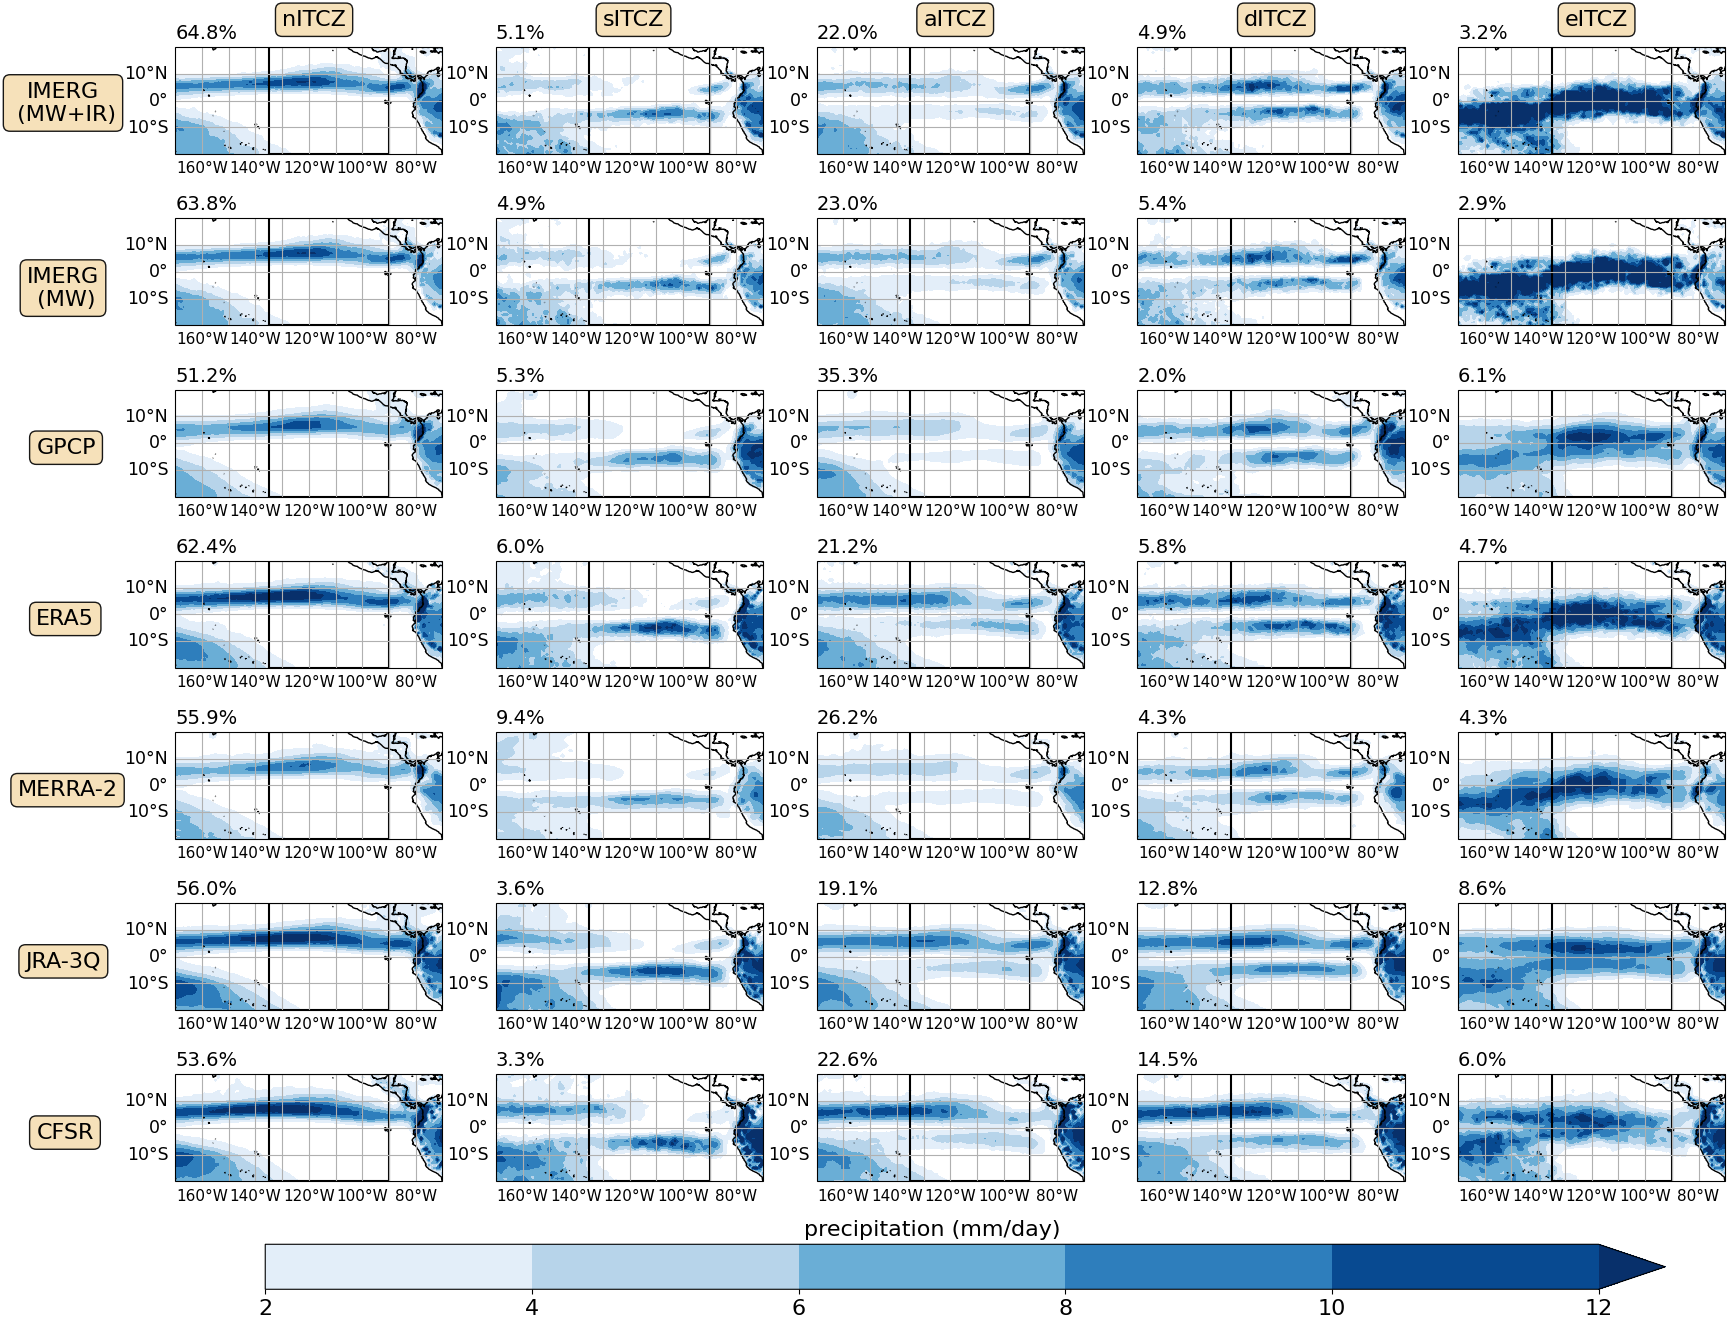

In [142]:
offset = 0
npan = 5
# all of the sizes are double the size they'll be in the paper 
#fig = plt.figure(figsize=(20, 24))#, constrained_layout='true')

fig = plt.figure(figsize=(20, 15))#, constrained_layout='true')
cc = 0 
for jj in range(0,ndataset,1):
    for ii in range(0,nitst,1):
        ax1 = fig.add_subplot(ndataset,npan,cc+1,projection=ccrs.PlateCarree())
        ax1.coastlines('50m')
        gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
        gl.xlocator = mticker.FixedLocator(lon_pts)
        gl.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20])
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 11, 'color': 'k'}
        gl.ylabel_style = {'size': 12.5, 'color': 'k'}

        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
        
        cf = plt.contourf(pr_ITCZ_all[lon_name], pr_ITCZ_all[lat_name], pr_ITCZ_all[:,:,ind_final[ii]].sel(dataset=dataset[jj]), \
                     cmap=color_map, transform=ccrs.PlateCarree(),levels=levp, extend ='max')
        plt.plot(lon_plt_epac,lat_plt_epac,color='k')
        
        plt.title(str(prc_ITCZ_all[jj,ind_final[ii]].values)+'%', loc='left', fontsize=14)
    
        if cc == 0:
            # place a text box in upper left in axes coords
            ax1.text(-0.42, 0.68, 'IMERG\n (MW+IR)', transform=ax1.transAxes, fontsize=16,
                horizontalalignment='center', verticalalignment='top', bbox=props)
        elif cc == 5:
            # place a text box in upper left in axes coords
            ax1.text(-0.42, 0.55, 'IMERG\n (MW)', transform=ax1.transAxes, fontsize=16,
                horizontalalignment='center', verticalalignment='top', bbox=props)
        elif cc == 10:
            # place a text box in upper left in axes coords
            ax1.text(-0.52, 0.55, 'GPCP', transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)
        elif cc == 15:
            # place a text box in upper left in axes coords
            ax1.text(-0.52, 0.55, 'ERA5', transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)
        elif cc == 20:
            # place a text box in upper left in axes coords
            ax1.text(-0.59, 0.55, 'MERRA-2', transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)
        elif cc == 25:
            # place a text box in upper left in axes coords
            ax1.text(-0.56, 0.55, 'JRA-3Q', transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)
        elif cc == 30:
            # place a text box in upper left in axes coords
            ax1.text(-0.52, 0.55, 'CFSR', transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)

        if cc < 5:
            ax1.text(0.4, 1.35, itcz_states[ind_final[cc]], transform=ax1.transAxes, fontsize=16,
                verticalalignment='top', bbox=props)
        cc = cc + 1
        
#fig.suptitle(r'Precipitation Rate (mm day$^{-1}$) of daily '+region_ti+' ITCZ states ('+mn_str+', '+yr_str+')',fontsize='x-large')

fig.subplots_adjust(bottom=0.10)
#cb = plt.colorbar(cf, orientation='horizont09l', pad=0.03)
cbar_ax = fig.add_axes([0.17, 0.04, 0.7, 0.03])
cb = fig.colorbar(cf, cax=cbar_ax, orientation="horizontal")
cb.ax.set_title('precipitation (mm/day)',size=16)
cb.ax.tick_params(labelsize=16) 

plt.savefig(figfolder+figname, dpi=150)